<a href="https://colab.research.google.com/github/AftabUdaipurwala/PythonBasics/blob/main/Feature_engineering_tutorial_python_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
# Mounting the drive for loading the data
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/py-master/ML/FeatureEngineering/2_outliers_z_score/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2_outliers_z_score.ipynb  Exercise  heights.csv  zscore.png


In [2]:
# reading  data in the file
df = pd.read_csv('/content/drive/MyDrive/py-master/ML/FeatureEngineering/2_outliers_z_score/heights.csv')
df.head(3)

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105


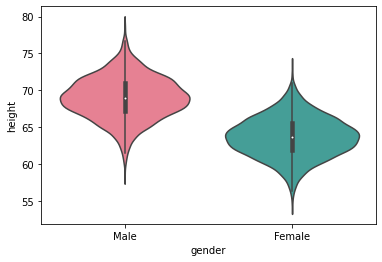

In [3]:
# check the data distribution
sns.violinplot(x='gender', y ='height', data = df, palette ='husl')

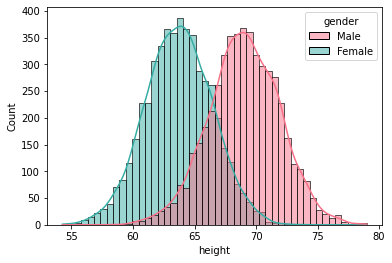

In [4]:
sns.histplot(hue='gender', x ='height',kde=True, data = df, palette ='husl',)

In [5]:
df.height.median()

66.31807008

In [6]:
df.height.mean() 

66.3675597548656

In [7]:
df.height.std()

3.847528120795573

In [8]:
# using 3 std deviation to remove outliers 
three_std = df.height.std()*3
lower = df.height.mean()-three_std
upper = df.height.mean()+three_std

In [9]:
df1 = df[(df.height>lower) & (df.height<upper)]
df1.shape

(9993, 2)

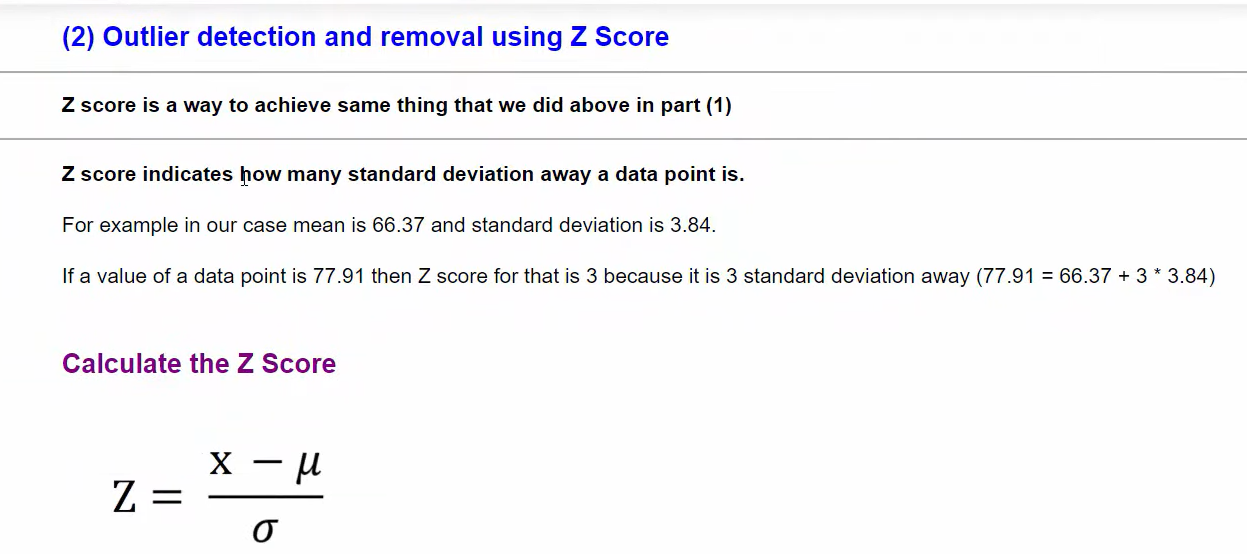

In [10]:
# using z score for calculating outlier
mean_ht = df.height.mean()
std_ht = df.height.std()
listed= list(df.height)
df['zscore'] = list(map(lambda x: (x-mean_ht)/std_ht,listed))
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


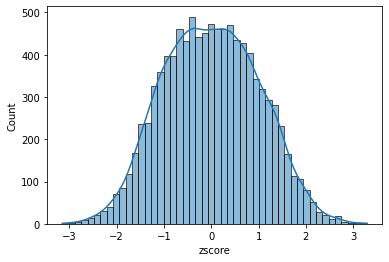

In [11]:
sns.histplot( x ='zscore',kde=True, data = df, palette ='husl')

In [12]:
df2 = df[(df['zscore']<3)&(df['zscore']>-3)]
df2.shape

(9993, 3)

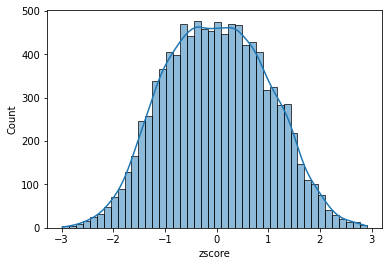

In [13]:
sns.histplot( x ='zscore',kde=True, data = df2, palette ='husl')